<a href="https://colab.research.google.com/github/mjavadpur/LSTM/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [75]:
from pandas.io.api import read_csv
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

import numpy as np
import os
import io
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense , LSTM

import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow


# **Read Data**

In [76]:


# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/StockMarkettingLSTM

df = pd.read_csv('S_Saipa.csv')

df.shape






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/StockMarkettingLSTM


(4610, 12)

# **Fonts**

In [77]:

fontx = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 26,
}
fonty = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 26,
}




# **Columns**

In [78]:

cols = df.columns.to_list()

print(cols)



['<TICKER>', '<DTYYYYMMDD>', '<FIRST>', '<HIGH>', '<LOW>', '<CLOSE>', '<VALUE>', '<VOL>', '<OPENINT>', '<PER>', '<OPEN>', '<LAST>']


# **Plot**

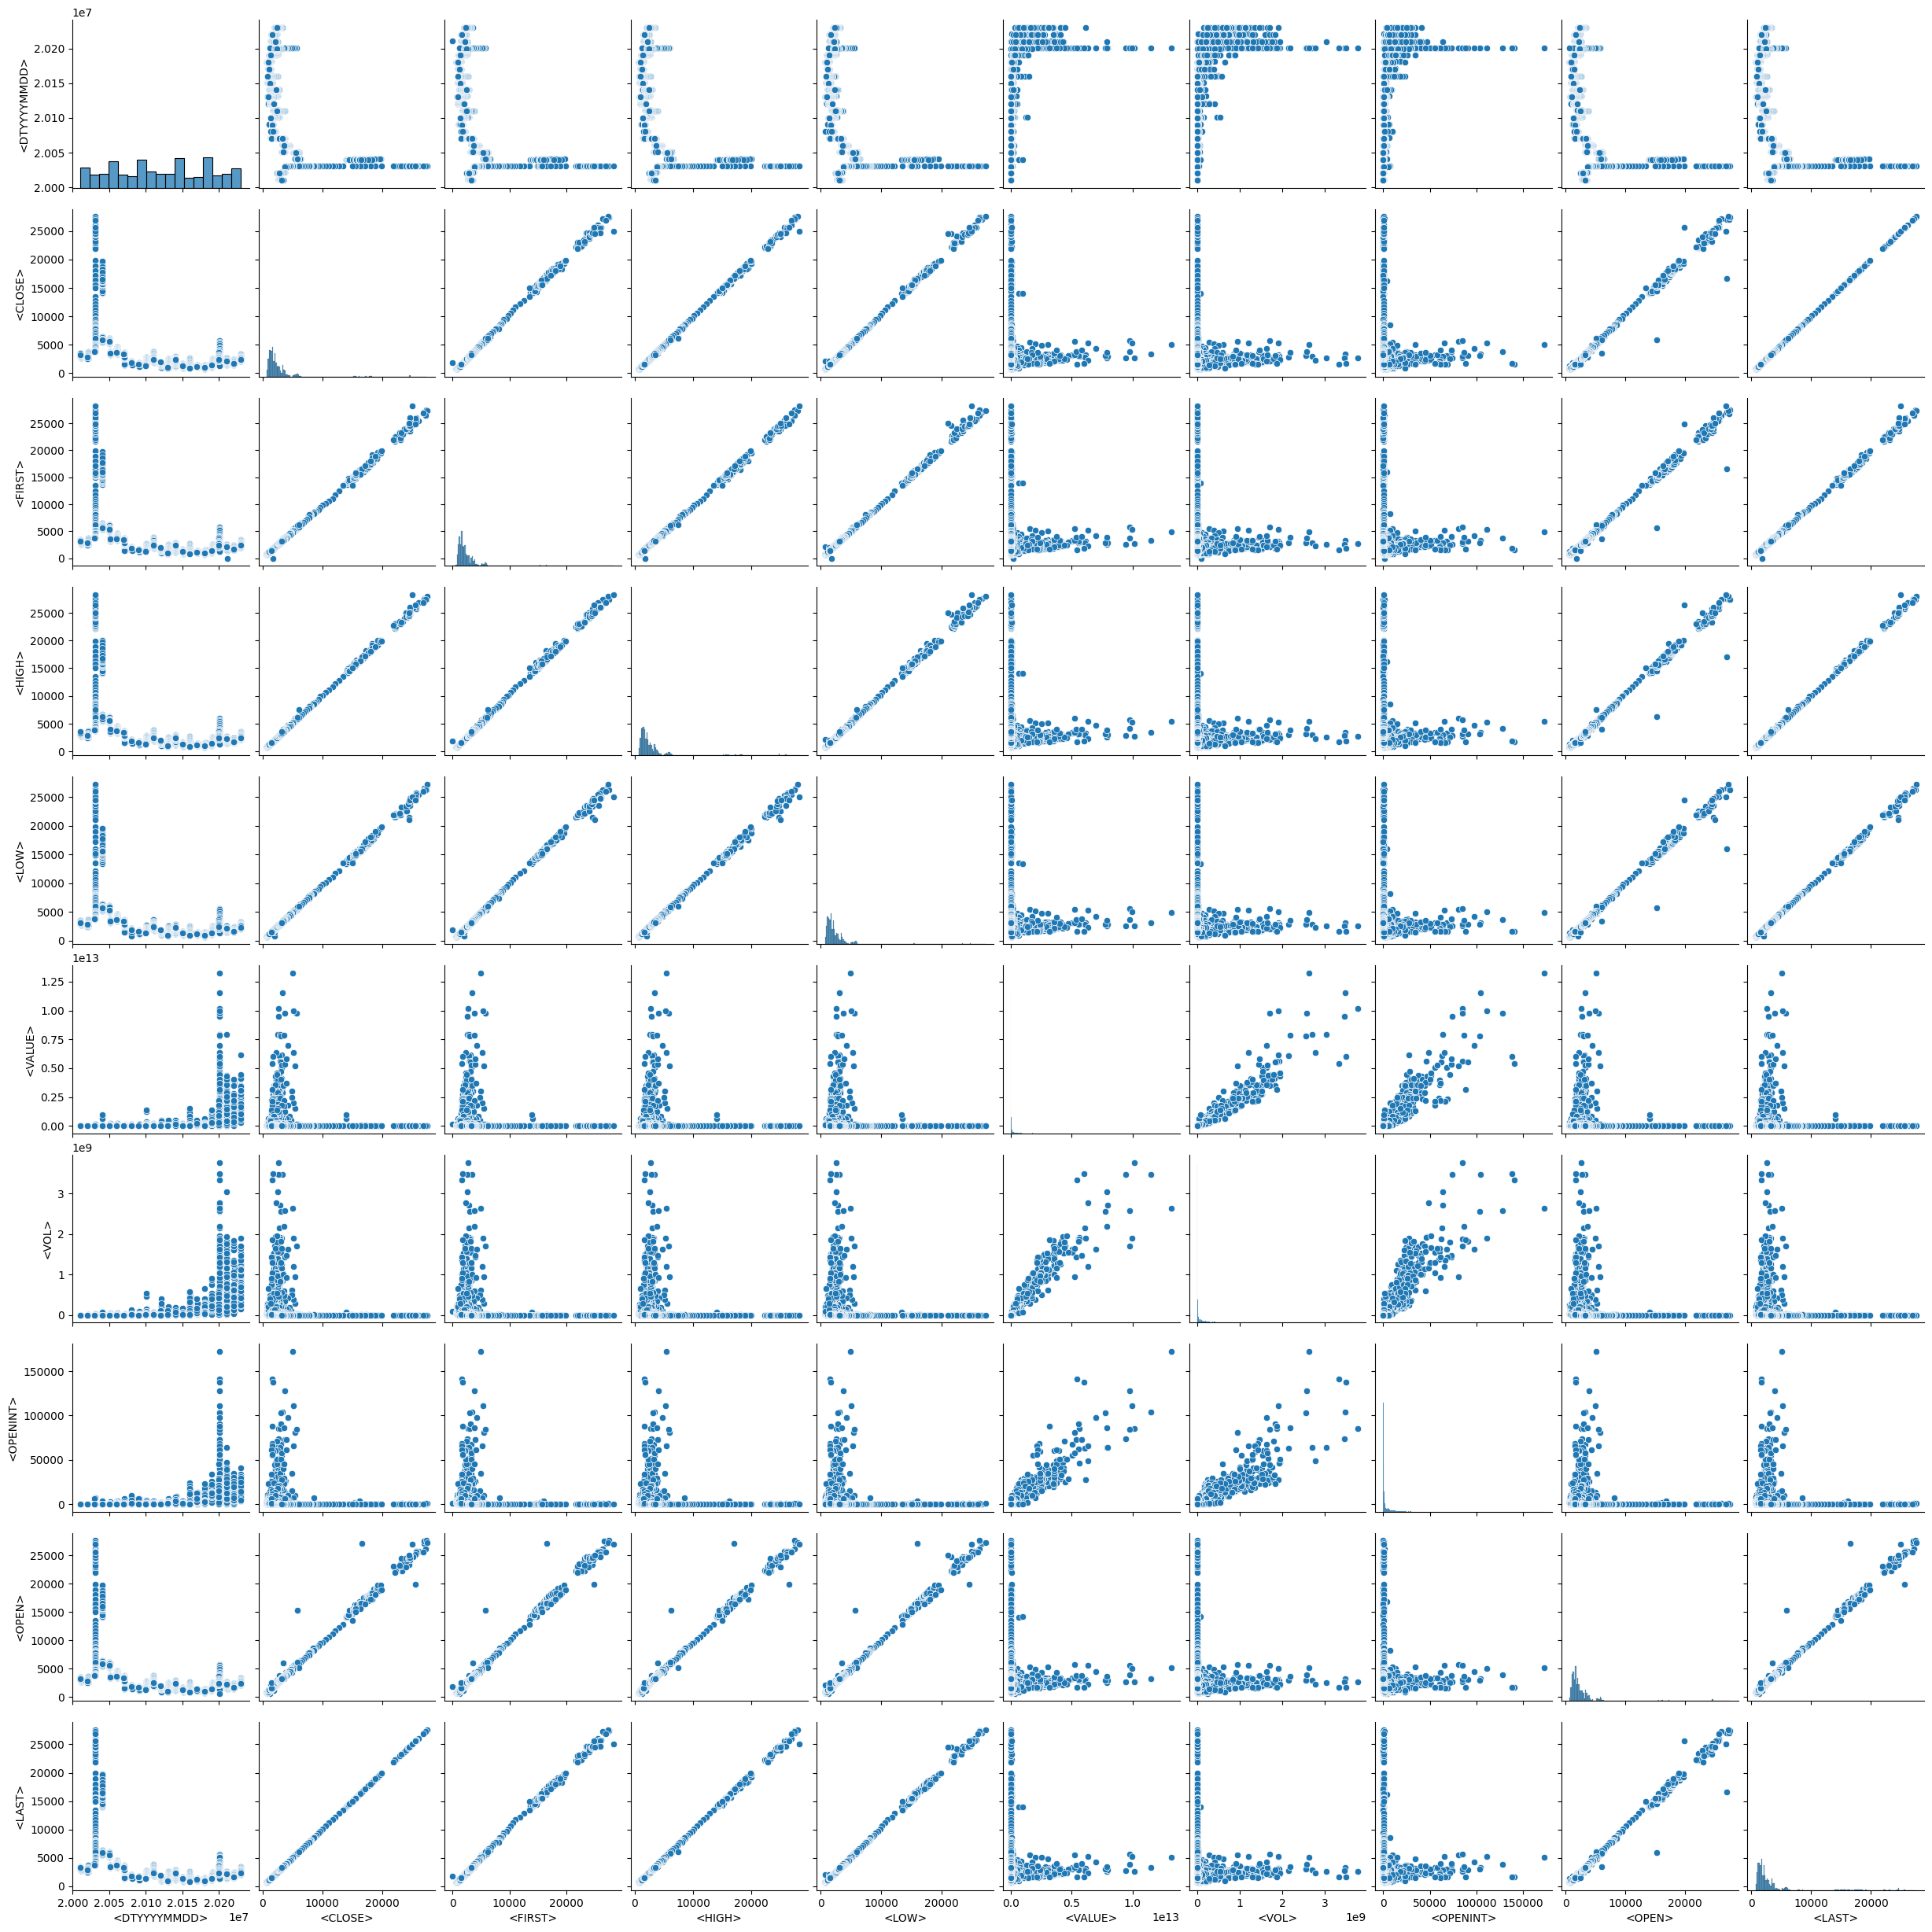

In [79]:
sns.pairplot(df[['<DTYYYYMMDD>', '<CLOSE>', '<FIRST>', '<HIGH>', '<LOW>','<VALUE>', '<VOL>', '<OPENINT>', '<PER>', '<OPEN>', '<LAST>']])

<Axes: xlabel='<DTYYYYMMDD>', ylabel='<CLOSE>'>

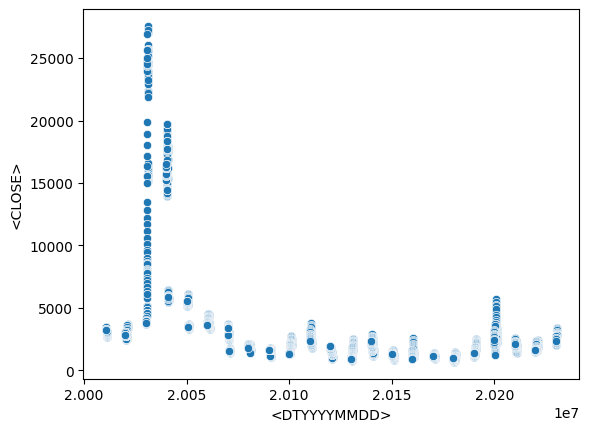

In [80]:
sns.scatterplot(data=df, x='<DTYYYYMMDD>', y='<CLOSE>')

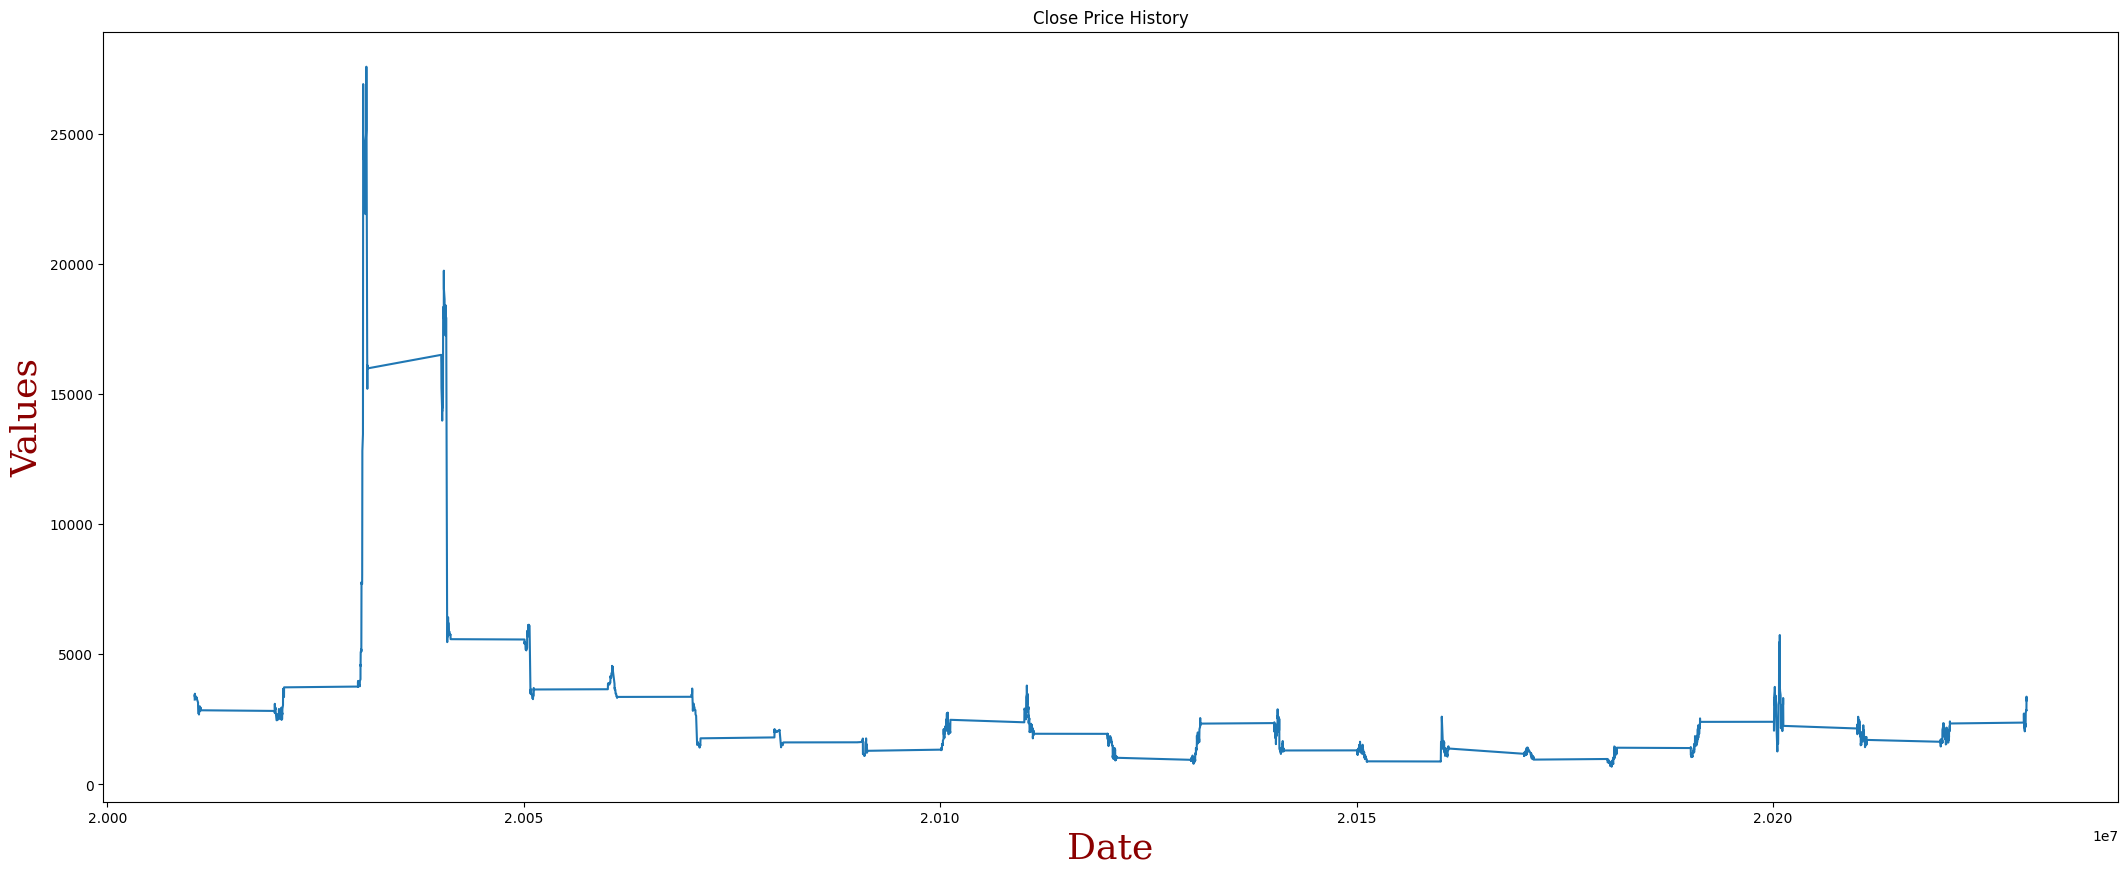

In [81]:
data = pd.DataFrame(df)


y = df['<CLOSE>']
x = df['<DTYYYYMMDD>']
plt.figure(figsize=(26,10))
plt.title('Close Price History')
plt.plot(df['<DTYYYYMMDD>'],df['<CLOSE>'])
plt.xlabel('Date', fontdict = fontx)
plt.ylabel('Values', fontdict = fonty)
plt.show()




In [82]:

data = df.filter(['<CLOSE>'])

dataset = data.values

trainingDataLen = math.ceil(len(dataset)*.8)

scalar = MinMaxScaler(feature_range=(0,1))

scaled_data = scalar.fit_transform(dataset)

train_data = scaled_data[0:trainingDataLen,:]

x_train = []
y_train = []


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


type(x_train)

  

list

In [83]:
x_train , y_train = np.array(x_train) ,np.array(y_train) 

type(x_train)

numpy.ndarray

In [84]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(3628, 60, 1)

In [85]:

model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(LSTM(50,return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))


In [88]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [89]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3628/3628 [==============================] - 119s 32ms/step - loss: 5.9536e-05


In [95]:
img_2 = cv2.imread('Project_2.PNG')

cv2_imshow(img_2)

AttributeError: ignored